# PN junctions

In [1]:
import numpy as np
import matplotlib.pyplot as pt
from scipy import constants

from scipy.optimize import fsolve

import sympy as sp

import libs.PN_lib as PN


## Define the material

### Semiconductor constants

In [25]:
ni=1e11 #e-/cm3
ebr=3e5 #V/cm
epsilon_rel=12
Dp=10 #Difussivity of holes cm2/s
Dn = 100 #Difussivity of e- cm2/s



### Junction design 

In [26]:
Na=1e16 #Atoms/cm3
Nd=1e14 #Atoms/cm3
tau_p=100e-9 #s
tau_n=100e-9 #s
length_P=0.1 #cm
length_N=0.1 #cm
section=1 #cm^2
Temp=300 #Kelvin



If diffusion is fixed then mobility set by thermal voltage

In [27]:
Vt=PN.Vt(Temp)
mu_p=Dp/Vt #Mobility of holes cm2/(V*s)
mu_n=Dn/Vt #Mobility of electrons cm2/(V*s)
print(Vt)
print(mu_p)
print(mu_n)

0.025851999786435535
386.81727071833603
3868.17270718336


## Results

### Static characteristics 

In [28]:
Vo=PN.vo(Na,Nd,ni,PN.Vt(Temp))
Vo

0.4762114346586538

In [29]:
Vbreakdown=PN.Vbr(ebr,epsilon_rel,Na,Nd,Vo)
Vbreakdown


3013.5947284496892

In [30]:
Is=PN.Isat(section,Na,Nd,ni,Dp,PN.Lp(Dp,tau_p),Dn,PN.Ln(Dp,tau_n))
Is

1.7623942974e-07

### Concentration

In [31]:
Vtest=10*Vt
print(Vtest)

0.25851999786435537


In [32]:
Ldep,LdepN,LdepP=PN.Ldepletion(Na,Nd,Vtest,Vo,epsilon_rel)
print(Ldep)
print(LdepP)
print(LdepN)

0.00017076786498419622
1.6907709404375863e-06
0.00016907709404375863


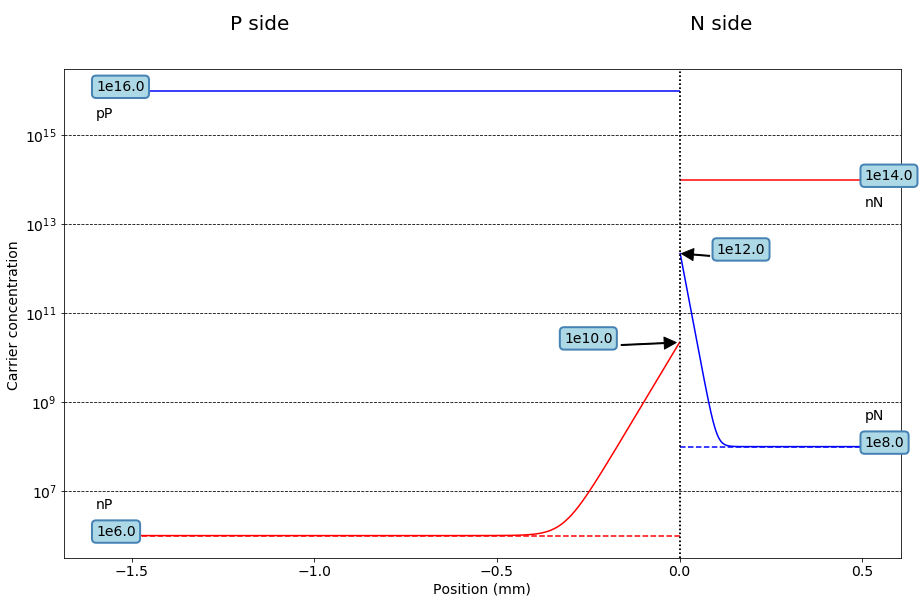

In [33]:
PN.plot_concentration_carriers(Na,Nd,ni,Temp,Vtest,epsilon_rel,Dn,tau_n,Dp,tau_p)

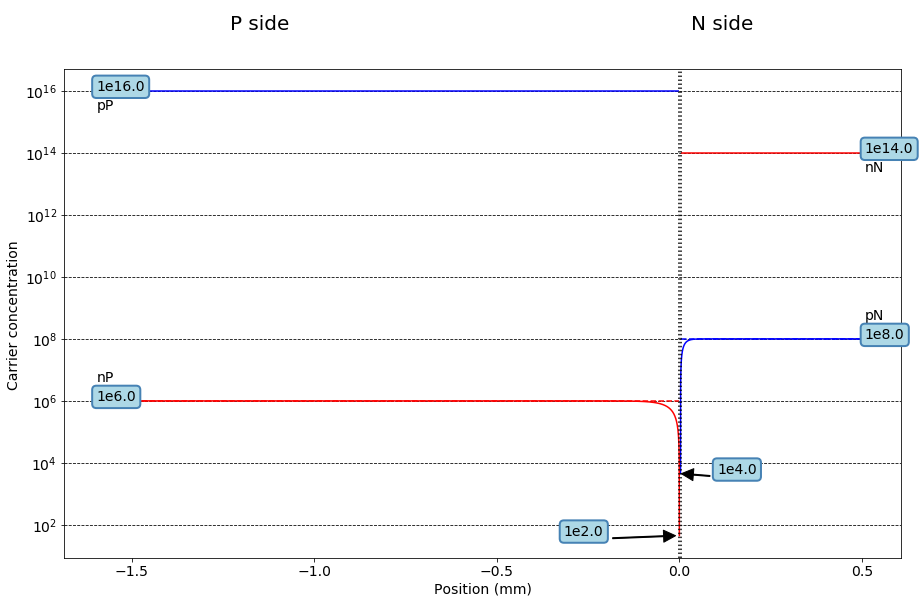

In [34]:
PN.plot_concentration_carriers(Na,Nd,ni,Temp,-Vtest,epsilon_rel,Dn,tau_n,Dp,tau_p)

### Currents

In [35]:
I_forward_test=PN.ipn_vj(Is,PN.Vt(Temp),Vtest)
I_reverse_test=PN.ipn_vj(Is,PN.Vt(Temp),-Vtest)
print(I_forward_test)
print(I_reverse_test)

0.0038817555314346118
-1.7623142848226843e-07


In [36]:
Temp_hot=310
I_forward_test2=PN.ipn_vj(Is,PN.Vt(Temp_hot),Vtest)
I_reverse_test2=PN.ipn_vj(Is,PN.Vt(Temp_hot),-Vtest)
print(I_forward_test2)
print(I_reverse_test2)

0.0028114196762810033
-1.7622838251361107e-07


In [37]:
Lp=PN.Lp(Dp,tau_p)
Ln=PN.Ln(Dn,tau_n)
print(Lp)
print(Ln)

0.001
0.0031622776601683794


In [38]:
(1e10-1e6)>(1e12-1e8)

False

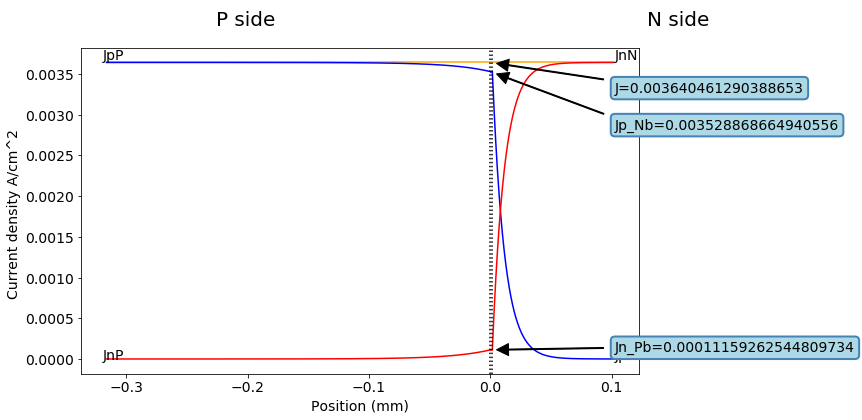

In [39]:
PN.plot_currents(Na,Nd,ni,Temp,Vtest,epsilon_rel,Dn,tau_n,Dp,tau_p)

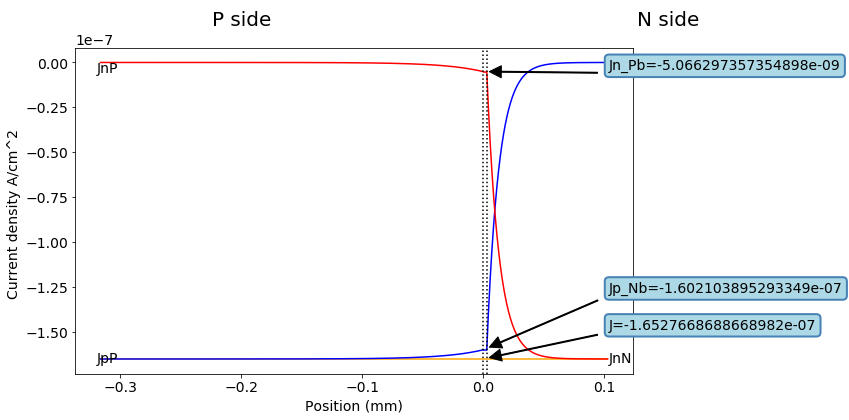

In [40]:
PN.plot_currents(Na,Nd,ni,Temp,-Vtest,epsilon_rel,Dn,tau_n,Dp,tau_p)

### IV curve

0.0038817555314346118


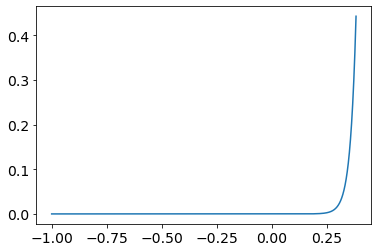

In [41]:
v_range=np.linspace(-1,Vo*0.8,10000)
v_test=np.array([-10,0.4])
print(PN.ipn_vj(Is,PN.Vt(Temp),Vtest))
pt.plot(v_range,PN.ipn_vj(Is,PN.Vt(Temp),v_range))

### Cj curve

[5.75144641e-10 2.38929744e-09]


c:\Users\fernandezmiapablo\OneDrive - Universidad de Oviedo\Docencia\Curso 2023-2024\Grado de Teleco\Dispositivos Electronicos Fotonicos\Continuous Assesment\libs\PN_lib.py:106: RuntimeWarning: divide by zero encountered in true_divide
  cj_squared=epsilon_mat*(NA*ND*constants.elementary_charge)/(2*NA_ND*vapplied)


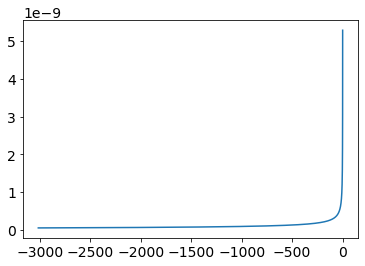

In [42]:
v_range=np.linspace(-Vbreakdown,Vo,10000)
v_test=np.array([-25,-1])
print(PN.Cj(Na,Nd,v_test,Vo,epsilon_rel,section))
pt.plot(v_range,PN.Cj(Na,Nd,v_range,Vo,epsilon_rel,section))

### Depletion zone length

[0.00118464 0.00030097 0.00019236]


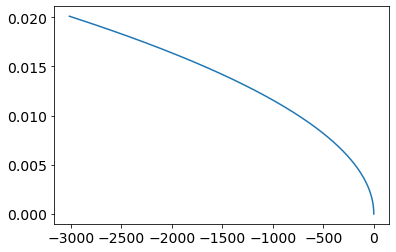

In [43]:
v_range=np.linspace(-Vbreakdown,Vo,10000)
v_test=np.array([-10,-0.2,0.2])
Ldep,LdepP,LdepN=PN.Ldepletion(Na,Nd,v_test,Vo,epsilon_rel)
print(Ldep)
Ldep,LdepP,LdepN=PN.Ldepletion(Na,Nd,v_range,Vo,epsilon_rel)
pt.plot(v_range,Ldep)

# Bulk Resistance

In [44]:
Rp=PN.BulkResistance(Na,mu_p,section,length_P)
print(Rp)

0.1613554912599951


In [45]:
Rn=PN.BulkResistance(Nd,mu_n,section,length_P)
print(Rn)

1.6135549125999513


IV resistance

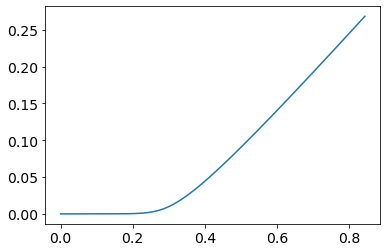

In [46]:
i_range=np.linspace(0,Vo/(Rp+Rn),10000)

pt.plot(PN.IV_resistance(Is,PN.Vt(Temp),i_range,Rn,Rp),i_range)

In [47]:
#i_resistance=PN.solve_I(Is,PN.Vt(Temp),Rn,Rp,1)
#print(i_resistance)